In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d
import numpy.random as npr

4. write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically;

The goal of this section is to sample muon ejection angles from a probability density function that matches the physics of the interaction. The PDF required is the normalised probability density function. The inverse transmorm method is then used to sample angles from this PDF. 

**Finding the Probability Density Function**

The differential crossection equation is repeated below. It expresses probability that an event happens at each possible scattering angle $\theta$ (**reference**).

\begin{equation}
\frac{d\sigma}{d \Omega} =\frac{e^{4}}{64 \pi^{2} s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left(1+\frac{4}{s}\left(m_{e}^{2}+m_{\mu}^{2}\right)+\left(1-\frac{4 m_{e}^{2}}{s}\right)\left(1-\frac{4 m_{\mu}^{2}}{s}\right) \cos ^{2} \theta\right) 
\end{equation}

The differential cross section can be simplified as,

$$\frac{d\sigma}{d \Omega} = a + b~cos^2(\theta)$$

where,

$$a = \frac{e^{4}}{64 \pi^{2} s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[1+\frac{4}{s}(m_e^2+m_\mu^2)\right]$$

$$b = \frac{e^{4}}{64 \pi^{2} s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[\left(1-\frac{4m_\mu^2}{s}\right)\left(1-\frac{4m_e^2}{s}\right)\right].$$

The differential cross section can be used as a PDF to sample the random numbers if we normalise it using the total cross section. The integral of a PDF over it's entire range should equal one. The integral of the differential cross section over it's entire range equals the total crossection. Therfore if we divide through by the total cross section we get a normalised PDF.

$$\int^{4\pi~sr}_{0}\frac{d\sigma}{d \Omega} d\Omega = \sigma $$

$$\int^{4\pi~sr}_{0}\frac{1}{\sigma}\frac{d\sigma}{d \Omega} d\Omega = 1 $$

The probability density function of ejected muons having a solid angle $\Omega$ is then,

$$\mathbb{P}(\Omega) = \frac{1}{\sigma}\frac{d\sigma}{d \Omega}$$

To find the probability density function in terms of theta we can integrate over phi.

$$\mathbb{P}(\Omega) = \int^{2\pi}_{0} \frac{1}{\sigma}\frac{d\sigma}{d \Omega} \sin\theta~d\phi$$

$$\mathbb{P}(\theta) = \frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}$$
 
The aim is to sample random numbers (ejection angles, $\theta$) from this probability density function.

**Inverse Transform Sampling**

The sampling method used is known as Inverse Transmorm Sampling. The goal of this method is to take a random number generated from the uniform probability density function $U$ and pass it into a function, $F(U)$, that returns a sample of our generated dataset $X$. In this case our generated dataset is made of ejection angles. 

$$F(U) = X$$


This function we seek can be shown to be the inverse of the cumulitive density function, CDF, of our probability density function. The CDF is the probability of sampling an event with a value less than $x$.

To prove $CDF^{-1}(U)$ is indeed the function $F(U)$ we use probability notation. 

The CDF is defined as,

$$CDF(x) = \mathbb{P}(X\leq~x).$$ 

If we sub in $F(U) = X$ from before then we get,

$$CDF(x) = \mathbb{P}(F(U)\leq~x).$$ 

If we apply the inverse function $F^{-1}(U)$ to both sides of the inequality then we arrive at,

$$CDF(x) = \mathbb{P}(U \leq~F^{-1}(x)).$$ 

This expresses the probability that a value sampled from the uniform distrubution is less than $F^-1(x).$ The uniform distribution is such that the probability of sampling less than a vaue is equal to that value. As can be seen in the uniform distribution below. The probability of sampling an $U < 0.8$ is the area of the blue section before the red line. This is 0.8 of the total area. Therfore $\mathbb{P}(U < 0.8) = 0.8$ and more generally $\mathbb{P}(U < u) = u$.

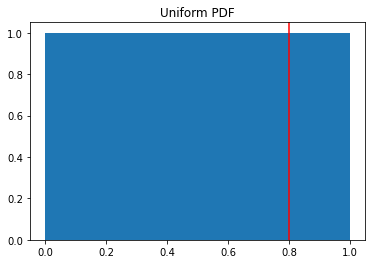

This argument show's that, 

$$CDF(x) = \mathbb{P}(U\leq~F^{-1}(x)) = F^{-1}(x).$$ 

$$CDF(x) = F^{-1}(x).$$

These functions are the inverse of eachother. This means that, $F(x) = CDF{^-1}(x)$. This is true for any value of x. We can sub in the sample from our uniform distribution U and we get. 

$$F(U) = CDF^{-1}(U)$$

$F(U)$ was origionaly defined as a function that will produce our desired dataset X when U is a uniformly distributed random number from 0 to 1. It has now been shown that the inverse of the CDF meets these requirements. Therefore the inverse CDF can be used to sample angles from the normalised differential cross section.

**Finding the Inverse CDF**

The PDF for the muon ejection angle that matches the physics of the interaction is, 

$$\mathbb{P}(\theta) = \frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}$$

The CDF is defined as the integral, 

$$CDF(\theta) = \int^{\theta}_{0}\frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}~d\theta = \int^{\theta}_{0}\frac{2\pi\sin\theta}{\sigma}[a + b~cos^2(\theta)]~d\theta = \frac{2\pi}{\sigma}\left[-\frac{\cos\theta}{3}(3a+b~\cos^2\theta)\right].$$ 

The inverse of this function cannot be found analyticaly. Instead a look up tabel is generated. For many $\theta$ values the value of CDF is calculated and the two values are associated with eachother. The inverse function of finding the CDF from a particular $\theta$ can then be found by looking for the value in the tabel. There is an issue if we want to know the CDF for a theta value we have not calculated. In this case we use linear iterpolation. This simply means we assume the path between two calculated vaues is linear so we can guess any value inbetween. 

SciPy has a function for interpolation called interpl1d and this will be used to create our approximate inverse function.

Text(0.5, 1.0, 'Generated Muon Angular Distribution')

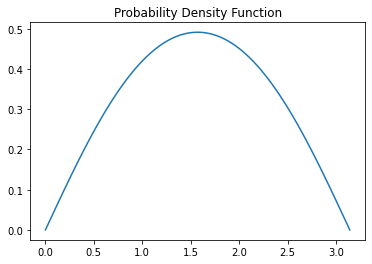

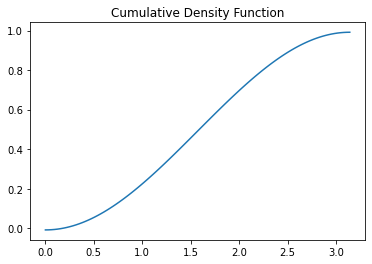

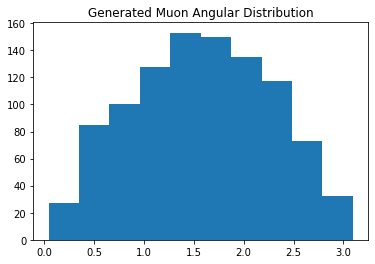

In [4]:
#The functions use eachother and the constants. It is advisable to paste the whole cell into your code, or save it as .py and import it in. 

import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d
import numpy.random as npr
import axispi as axp

#conversion factor
#con1 = 2.56819e-3 #MeV−2,  (DCS MeV-2)/con1 = DCS barns
#----------constants-------------
e = 1.6e-19
#Electron and Muon mass squared
mu2 = 105.658**2 #Mev^2
me2 = 0.5110**2 #Mev^2
S = 4*mu2 + 5000 #5000MeV^2 over threshold energy
#---------------------------------

def ab(s):
    #more constants to simplify calculation
    ce = 1-(4*me2/s)
    cu = 1-(4*mu2/s)
    c1 = e**4/(64 * math.pi**2 * s)
    c2 = c1 * cu**(1/2) * ce**(-1/2)

    a = c2 * (1+(4/s)*(me2+mu2))
    b = c2 * (1-(4*mu2/s)) * (1-(4*me2/s))
    return a, b

#differential cross section
def dcs(theta,s):#theta - ejection angle #s - CoM energy squared
    a,b = ab(s)
    return a+b*math.cos(theta)**2

#total cross section
def sigma(s):#s - CoM energy squared
    a,b = ab(s)
    return (4*math.pi/3)*(3*a + b)

#############################################################################

#probability density function, PDF of ejection angles
def pdf(theta,s):#theta - ejection angle #s - CoM energy squared
    a,b = ab(s)
    sig = sigma(s)
    DCS = dcs(theta,s)
    return (2*math.pi*math.sin(theta)/sig)*DCS

#Cumulitive Density Function. Probability a THETA sampled is less than theta in the function.
def cdf(theta,s):
    a,b = ab(s)
    sig = sigma(s)
    return (2*math.pi/sig)*((-math.cos(theta)*(3*a+b*math.cos(theta)**2)*1/3)+ a)

#Theta Generation, Sampling from the PDF, Using Inverse CDF Method
def thetaGen2(howMany,s):#howMany - the number of thetas to generate
    #generate the lookup table for the inverse function
    theta = np.linspace(0,math.pi,100)
    CDF = [cdf(x,s) for x in theta]
    PDF = [pdf(x,s) for x in theta]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
    thetaPredictor = interp1d(CDF, theta, kind = "linear")
    return [float(thetaPredictor(x)) for x in npr.uniform(min(CDF),max(CDF),howMany)]

theta = np.linspace(0,math.pi,100)
PDF = [pdf(x,S) for x in theta]
CDF = [cdf(x,S) for x in theta]

figPDF = plt.figure()
plt.plot(theta,PDF)
plt.title('Probability Density Function')

figCDF = plt.figure()
plt.plot(theta,CDF)
plt.title('Cumulative Density Function')

figThetaGen = plt.figure()
plt.hist(thetaGen2(1000,S))
plt.title('Generated Muon Angular Distribution')

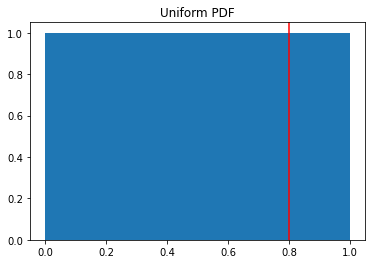

In [24]:
figuniform = plt.figure()
plt.bar(0.5,1, width = 1)
plt.title('Uniform PDF')
plt.axvline(x = 0.8,color = 'r')

The differential cross section is a PDF of the form,

>$a + b cos^2(\theta^*)$$~~~~~~~~~~~~~~~~~~~$*(1.0)*

where a and b are as defined above.

The $CDF(\theta^*)$ is defined as, $$CDF(\theta^*) = \int^{\theta^*}_{0}a + b cos^2(\theta^*)\,dx,$$

$$\int^{\theta^*}_{0}a + b cos^2(\theta^*)\,dx, => $$


ab 0.49131750885661296
[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]
[-0.008682491143387075, 0.022425605285105295, 0.11104339221325268, 0.24457344303538303, 0.4059556561072357, 0.5766793616059901, 0.7380615746778428, 0.8715916254999734, 0.9602094124281206, 0.9913175088566131]
rand [0.30767295 0.29274148 0.81268184 0.23475478 0.65062517 0.06923877
 0.55170788 0.01910819 0.27904575 0.64718176]
a 0.7020561858675468
a 2.687727502116333
a 2.4372172189575014
a 1.6793923254962526
a 1.5576937118147058
a 1.7802478228732677
a 0.1936924106578067
a 1.1032124315705607
a 1.8771348415948452
a 1.4297861359304498


(array([ 296.,  720., 1101., 1411., 1527., 1519., 1385., 1052.,  717.,
         272.]),
 array([5.80544876e-04, 3.14655166e-01, 6.28729787e-01, 9.42804408e-01,
        1.25687903e+00, 1.57095365e+00, 1.88502827e+00, 2.19910289e+00,
        2.51317751e+00, 2.82725214e+00, 3.14132676e+00]),
 <BarContainer object of 10 artists>)

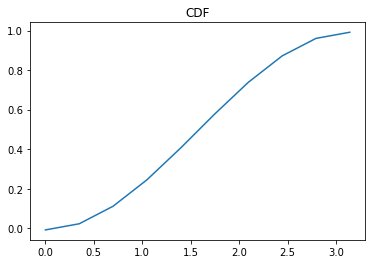

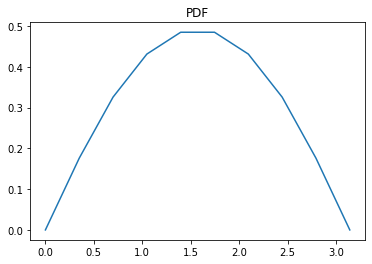

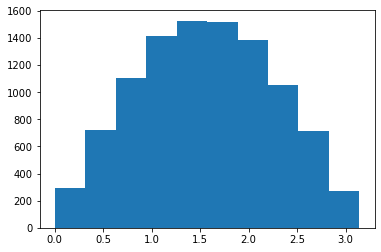

In [131]:
def pdf(theta):
    #Electron and Muon mass squared
    e = 1.6e-19
    mu2 = 105.658**2 #Mev
    me2 = 0.5110**2 #Mev
    s = 4*mu2 + 5000 #Mev point 9, center beam energy
    alpha = (e**2)/(4*math.pi)

    #constant to simplify calculation
    ce = 1-(4*me2/s)
    cu = 1-(4*mu2/s)
    c1 = ((alpha**2)/(4*s)) * math.sqrt(cu) / math.sqrt(ce)
    
    #assuming me2 = 0
    #a = ((alpha**2)/(4*s)) * math.sqrt(cu) * (1+ (4*mu2/s))
    #b = ((alpha**2)/(4*s)) * cu
    a = c1 * (1+(4/s)*(me2+mu2))
    b = c1 * (1-(4*mu2/s)) * (1-(4*me2/s))
    sigma = (4*math.pi/3) *(3*a + b)
    return 2*math.pi*math.sin(theta)/sigma *(a + b*(math.cos(theta)**2))

def cdf(theta):
    #Electron and Muon mass squared
    e = 1.6e-19
    mu2 = 105.658**2 #Mev
    me2 = 0.5110**2 #Mev
    s = 4*mu2 + 5000 #Mev point 9, center beam energy
    alpha = (e**2)/(4*math.pi)

    #constant to simplify calculation
    ce = 1-(4*me2/s)
    cu = 1-(4*mu2/s)
    c1 = ((alpha**2)/(4*s)) * math.sqrt(cu) / math.sqrt(ce)
    
    a = c1 * (1+(4/s)*(me2+mu2))
    b = c1 * (1-(4*mu2/s)) * (1-(4*me2/s))
    sigma = (4*math.pi/3) *(3*a + b)
    return (2*math.pi/sigma)*((-math.cos(theta)*(3*a+b*math.cos(theta)**2)*1/3)+ a)

def thetaGen2(howMany): 
    theta = np.linspace(0,math.pi,10)
    CDF = [cdf(x) for x in theta]
    PDF = [pdf(x) for x in theta]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
    thetaPredictor = interp1d(CDF, theta, kind = "linear")
    return thetaPredicted = [float(thetaPredictor(x)) for x in npr.uniform(min(CDF),max(CDF),howMany)]

#plots
figcdf = plt.figure()
plt.plot(theta,CDF)
plt.title('CDF')
figpdf = plt.figure()
plt.plot(theta,PDF)
plt.title('PDF')
figThetaPred = plt.figure()
plt.hist(thetaPredicted)





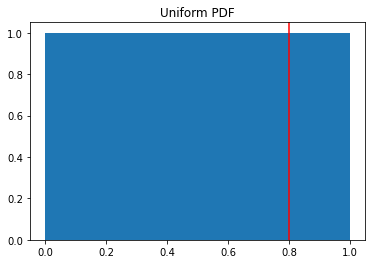

In [23]:
figuniform = plt.figure()
plt.bar(0.5,1, width = 1)
plt.title('Uniform PDF')
plt.axvline(x = 0.8,color = 'r')


(array([ 38.,  83.,  98., 123., 156., 143., 148., 102.,  78.,  31.]),
 array([0.0485444 , 0.34916556, 0.64978671, 0.95040787, 1.25102902,
        1.55165017, 1.85227133, 2.15289248, 2.45351363, 2.75413479,
        3.05475594]),
 <BarContainer object of 10 artists>)

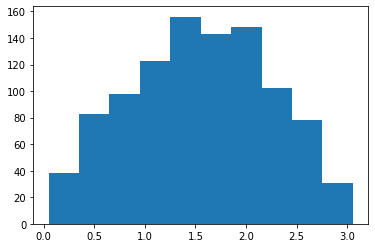

In [101]:
def pdf(theta):
    #Electron and Muon mass squared
    e = 1.6e-19
    mu2 = 105.658**2 #Mev
    me2 = 0.5110**2 #Mev
    s = 4*mu2 + 5000 #Mev point 9, center beam energy
    alpha = (e**2)/(4*math.pi)

    #constant to simplify calculation
    ce = 1-(4*me2/s)
    cu = 1-(4*mu2/s)
    c1 = ((alpha**2)/(4*s)) * math.sqrt(cu) / math.sqrt(ce)
    
    #assuming me2 = 0
    #a = ((alpha**2)/(4*s)) * math.sqrt(cu) * (1+ (4*mu2/s))
    #b = ((alpha**2)/(4*s)) * cu
    a = c1 * (1+(4/s)*(me2+mu2))
    b = c1 * (1-(4*mu2/s)) * (1-(4*me2/s))
    sigma = (4*math.pi/3) *(3*a + b)
    return 2*math.pi*math.sin(theta)/sigma *(a + b*(math.cos(theta)**2))

def thetaGen(howMany):    
    thetas = []
    count = 0
    while count < howMany:
        potential = npr.uniform(0,math.pi)
        y = npr.uniform(0,1)
        if y < pdf(potential): 
            thetas.append(potential)
            count += 1
    return thetas

newThetas = thetaGen(1000)

plt.hist(newThetas)




In [ ]:
https://link.springer.com/article/10.1134/S0015462821070053<br>
Kazakov, L.I. Laminar Flow of a Viscous Liquid in the Entrance Region of a Circular Pipe. Fluid Dyn 56, 954–966 (2021). https://doi.org/10.1134/S0015462821070053

fluid flow in a pipe

$R$ = pipe radious or beam radious<br>
$V_{0}$ = Velocity at the center of the pipe or beam<br>
$V(r)$ = the velocity of the pipe or beam at radious r

$$V(r) = V_{0}\left(1-\frac{r^2}{R^2}\right)$$